In [98]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [99]:
train.describe() #평균이 결국 생존율

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [100]:
train.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

## 1-2 Name

In [101]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [102]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [103]:
train['Title_label'] = train['Title'].astype('category').cat.codes

train[['Title','Title_label']]

Title  Title_label
0       Mr            2
1      Mrs            3
2     Miss            1
3      Mrs            3
4       Mr            2
..     ...          ...
886  Other            4
887   Miss            1
888   Miss            1
889     Mr            2
890     Mr            2

[891 rows x 2 columns]

In [104]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme'], 'Other')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [105]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Title, dtype: int64

In [106]:
test['Title_label'] = test['Title'].astype('category').cat.codes

test[['Title','Title_label']]

Title  Title_label
0        Mr            2
1       Mrs            3
2        Mr            2
3        Mr            2
4       Mrs            3
..      ...          ...
413      Mr            2
414   Other            4
415      Mr            2
416      Mr            2
417  Master            0

[418 rows x 2 columns]

In [3]:
# 참고 데이터
# 전체데이터 = [train, test]

In [4]:
# for 데이터 in 전체데이터:
#     데이터['Title'] = 데이터['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [5]:
# title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
#                  "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
#                  "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
# for 데이터 in 전체데이터:
#     데이터['Title'] = 데이터['Title'].map(title_mapping)

In [107]:
# 불필요 데이터 지우기
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [108]:
# 불필요 데이터 지우기
train.drop('Title', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)

In [109]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title_label  
0         A/5 21171   7.2500   NaN        S            2  
1          PC 17599  71.2833   C85        C            3  
2  STON/O2. 3101282   7.9250   NaN        S            1  
3            113803  53.1000  C123        S            3  
4            373450   8.0500   NaN        S            2

In [110]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  34.5      0      0   330911   7.8292   NaN   
1          893       3  female  47.0      1      0   363272   7.0000   NaN   
2          894       2    male  62.0      0      0   240276   9.6875   NaN   
3          895       3    male  27.0      0      0   315154   8.6625   NaN   
4          896       3  female  22.0      1      1  3101298  12.2875   NaN   

  Embarked  Title_label  
0        Q            2  
1        S            3  
2        Q            2  
3        S            2  
4        S            3

In [111]:
train["Age"].fillna(train.groupby("Title_label")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title_label")["Age"].transform("median"), inplace=True)

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title_label  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB


In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title_label  418 non-null    int8   
dtypes: float64(2), int64(4), int8(1), object(4)
memory usage: 33.2+ KB


#### 4.4.2 Binning
Binning/Converting Numerical Age to Categorical Variable, 숫자료 표시해야만 좀 더 정확하게 인공지능을 돌릴 수 있으므로!

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [114]:
전체데이터 = [train, test]

In [115]:
for 데이터 in 전체데이터:
    데이터.loc[ 데이터['Age'] <= 16, 'Age'] = 0,
    데이터.loc[(데이터['Age'] > 16) & (데이터['Age'] <= 26), 'Age'] = 1,
    데이터.loc[(데이터['Age'] > 26) & (데이터['Age'] <= 36), 'Age'] = 2,
    데이터.loc[(데이터['Age'] > 36) & (데이터['Age'] <= 62), 'Age'] = 3,
    데이터.loc[ 데이터['Age'] > 62, 'Age'] = 4

In [116]:
train.head()

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    male  1.0      1      0         A/5 21171   
1            2         1       1  female  3.0      1      0          PC 17599   
2            3         1       3  female  1.0      0      0  STON/O2. 3101282   
3            4         1       1  female  2.0      1      0            113803   
4            5         0       3    male  2.0      0      0            373450   

      Fare Cabin Embarked  Title_label  
0   7.2500   NaN        S            2  
1  71.2833   C85        C            3  
2   7.9250   NaN        S            1  
3  53.1000  C123        S            3  
4   8.0500   NaN        S            2

In [117]:
test.head()

PassengerId  Pclass     Sex  Age  SibSp  Parch   Ticket     Fare Cabin  \
0          892       3    male  2.0      0      0   330911   7.8292   NaN   
1          893       3  female  3.0      1      0   363272   7.0000   NaN   
2          894       2    male  3.0      0      0   240276   9.6875   NaN   
3          895       3    male  2.0      0      0   315154   8.6625   NaN   
4          896       3  female  1.0      1      1  3101298  12.2875   NaN   

  Embarked  Title_label  
0        Q            2  
1        S            3  
2        Q            2  
3        S            2  
4        S            3

## 1-3 Fare

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title_label  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB


In [119]:
for 데이터 in 전체데이터:
    데이터['Fare_bin'] = pd.qcut(train['Fare'], 5)
    데이터['Fare_label'] = 데이터['Fare_bin'].astype('category').cat.codes

In [120]:
train[['Fare','Fare_bin','Fare_label']]

Fare           Fare_bin  Fare_label
0     7.2500    (-0.001, 7.854]           0
1    71.2833  (39.688, 512.329]           4
2     7.9250      (7.854, 10.5]           1
3    53.1000  (39.688, 512.329]           4
4     8.0500      (7.854, 10.5]           1
..       ...                ...         ...
886  13.0000     (10.5, 21.679]           2
887  30.0000   (21.679, 39.688]           3
888  23.4500   (21.679, 39.688]           3
889  30.0000   (21.679, 39.688]           3
890   7.7500    (-0.001, 7.854]           0

[891 rows x 3 columns]

In [121]:
test[['Fare','Fare_bin','Fare_label']]

Fare           Fare_bin  Fare_label
0      7.8292    (-0.001, 7.854]           0
1      7.0000  (39.688, 512.329]           4
2      9.6875      (7.854, 10.5]           1
3      8.6625  (39.688, 512.329]           4
4     12.2875      (7.854, 10.5]           1
..        ...                ...         ...
413    8.0500    (-0.001, 7.854]           0
414  108.9000      (7.854, 10.5]           1
415    7.2500      (7.854, 10.5]           1
416    8.0500   (21.679, 39.688]           3
417   22.3583     (10.5, 21.679]           2

[418 rows x 3 columns]

In [122]:
# 불필요 데이터 지우기
for 데이터 in 전체데이터:
    데이터.drop('Fare', axis=1, inplace=True)
    데이터.drop('Fare_bin', axis=1, inplace=True)

In [123]:
train.head()

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    male  1.0      1      0         A/5 21171   
1            2         1       1  female  3.0      1      0          PC 17599   
2            3         1       3  female  1.0      0      0  STON/O2. 3101282   
3            4         1       1  female  2.0      1      0            113803   
4            5         0       3    male  2.0      0      0            373450   

  Cabin Embarked  Title_label  Fare_label  
0   NaN        S            2           0  
1   C85        C            3           4  
2   NaN        S            1           1  
3  C123        S            3           4  
4   NaN        S            2           1

In [124]:
test.head()

PassengerId  Pclass     Sex  Age  SibSp  Parch   Ticket Cabin Embarked  \
0          892       3    male  2.0      0      0   330911   NaN        Q   
1          893       3  female  3.0      1      0   363272   NaN        S   
2          894       2    male  3.0      0      0   240276   NaN        Q   
3          895       3    male  2.0      0      0   315154   NaN        S   
4          896       3  female  1.0      1      1  3101298   NaN        S   

   Title_label  Fare_label  
0            2           0  
1            3           4  
2            2           1  
3            2           4  
4            3           1

## 1-4. Family

In [125]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [126]:
#앞서 Name 컬럼에서 소개해드렸던 방식입니다.
mapping_data = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for 데이터 in 전체데이터:
    데이터['FamilySize'] = 데이터['FamilySize'].map(mapping_data)

In [127]:
train.head()

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    male  1.0      1      0         A/5 21171   
1            2         1       1  female  3.0      1      0          PC 17599   
2            3         1       3  female  1.0      0      0  STON/O2. 3101282   
3            4         1       1  female  2.0      1      0            113803   
4            5         0       3    male  2.0      0      0            373450   

  Cabin Embarked  Title_label  Fare_label  FamilySize  
0   NaN        S            2           0         0.4  
1   C85        C            3           4         0.4  
2   NaN        S            1           1         0.0  
3  C123        S            3           4         0.4  
4   NaN        S            2           1         0.0

In [128]:
test.head()

PassengerId  Pclass     Sex  Age  SibSp  Parch   Ticket Cabin Embarked  \
0          892       3    male  2.0      0      0   330911   NaN        Q   
1          893       3  female  3.0      1      0   363272   NaN        S   
2          894       2    male  3.0      0      0   240276   NaN        Q   
3          895       3    male  2.0      0      0   315154   NaN        S   
4          896       3  female  1.0      1      1  3101298   NaN        S   

   Title_label  Fare_label  FamilySize  
0            2           0         0.0  
1            3           4         0.4  
2            2           1         0.0  
3            2           4         0.0  
4            3           1         0.8

In [129]:
# 불필요 데이터 지우기
for 데이터 in 전체데이터:
    데이터.drop('SibSp', axis=1, inplace=True)
    데이터.drop('Parch', axis=1, inplace=True)

In [130]:
train.head()

PassengerId  Survived  Pclass     Sex  Age            Ticket Cabin  \
0            1         0       3    male  1.0         A/5 21171   NaN   
1            2         1       1  female  3.0          PC 17599   C85   
2            3         1       3  female  1.0  STON/O2. 3101282   NaN   
3            4         1       1  female  2.0            113803  C123   
4            5         0       3    male  2.0            373450   NaN   

  Embarked  Title_label  Fare_label  FamilySize  
0        S            2           0         0.4  
1        C            3           4         0.4  
2        S            1           1         0.0  
3        S            3           4         0.4  
4        S            2           1         0.0

In [131]:
test.head()

PassengerId  Pclass     Sex  Age   Ticket Cabin Embarked  Title_label  \
0          892       3    male  2.0   330911   NaN        Q            2   
1          893       3  female  3.0   363272   NaN        S            3   
2          894       2    male  3.0   240276   NaN        Q            2   
3          895       3    male  2.0   315154   NaN        S            2   
4          896       3  female  1.0  3101298   NaN        S            3   

   Fare_label  FamilySize  
0           0         0.0  
1           4         0.4  
2           1         0.0  
3           4         0.0  
4           1         0.8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Ticket       418 non-null    object 
 5   Cabin        91 non-null     object 
 6   Embarked     418 non-null    object 
 7   Title_label  418 non-null    int8   
 8   Fare_label   418 non-null    int8   
 9   FamilySize   418 non-null    float64
dtypes: float64(2), int64(2), int8(2), object(4)
memory usage: 27.1+ KB


## 1-5. Embarked

In [134]:
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].fillna('S')

In [135]:
mapping_data = {"S": 0, "C": 1, "Q": 2}
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].map(mapping_data)

## 1-6. Sex

In [136]:
for 데이터 in 전체데이터:
    데이터['Sex'] = 데이터['Sex'].astype('category').cat.codes

In [137]:
train.head()

PassengerId  Survived  Pclass  Sex  Age            Ticket Cabin  Embarked  \
0            1         0       3    1  1.0         A/5 21171   NaN         0   
1            2         1       1    0  3.0          PC 17599   C85         1   
2            3         1       3    0  1.0  STON/O2. 3101282   NaN         0   
3            4         1       1    0  2.0            113803  C123         0   
4            5         0       3    1  2.0            373450   NaN         0   

   Title_label  Fare_label  FamilySize  
0            2           0         0.4  
1            3           4         0.4  
2            1           1         0.0  
3            3           4         0.4  
4            2           1         0.0

## 1-7 Drop

In [ ]:
#train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
#test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [ ]:
# for 데이터 in 전체데이터:
#     데이터['Cabin'] = 데이터['Cabin'].str[:1]

In [ ]:
# Feature Scaling - 머신러닝에서는 숫자를 사용하고 이 범위를 유의미하게 주어야 합니다.
# 예를 들어 남, 여를 앞에서 1과 0을 주었는데 이 둘의 차는 1입니다. 완전히 다른 의미의 것이 1의 차가 있는것이죠.
# 그런데 비용은 10달러와 20달러가 있을 때 10달러 차이밖에 나지 않지만, 둘의 차는 10입니다. 거의 비슷한 의미의 것이 차가 10이나 된다는 것이죠.
# 그래서 중요하지 않은 것은 소숫점을 줍니다!

# cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
# for 데이터 in 전체데이터:
#     데이터['Cabin'] = 데이터['Cabin'].map(cabin_mapping)

In [139]:
# 불필요 데이터 지우기
for 데이터 in 전체데이터:
    데이터.drop('Ticket', axis=1, inplace=True)
    데이터.drop('Cabin', axis=1, inplace=True)

In [148]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [140]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  Embarked  Title_label  Fare_label  \
0            1         0       3    1  1.0         0            2           0   
1            2         1       1    0  3.0         1            3           4   
2            3         1       3    0  1.0         0            1           1   
3            4         1       1    0  2.0         0            3           4   
4            5         0       3    1  2.0         0            2           1   

   FamilySize  
0         0.4  
1         0.4  
2         0.0  
3         0.4  
4         0.0

In [141]:
test.head()

PassengerId  Pclass  Sex  Age  Embarked  Title_label  Fare_label  \
0          892       3    1  2.0         2            2           0   
1          893       3    0  3.0         0            3           4   
2          894       2    1  3.0         2            2           1   
3          895       3    1  2.0         0            2           4   
4          896       3    0  1.0         0            3           1   

   FamilySize  
0         0.0  
1         0.4  
2         0.0  
3         0.0  
4         0.8

## 1-8 상관도 분석

In [142]:
train.corr()

PassengerId  Survived    Pclass       Sex       Age  Embarked  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.040249 -0.030467   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.093305  0.106811   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.319716  0.045702   
Sex             0.042939 -0.543351  0.131900  1.000000  0.133485 -0.116569   
Age             0.040249 -0.093305 -0.319716  0.133485  1.000000 -0.032607   
Embarked       -0.030467  0.106811  0.045702 -0.116569 -0.032607  1.000000   
Title_label     0.085016 -0.052471 -0.195910  0.040484  0.511916 -0.081928   
Fare_label     -0.004906  0.317783 -0.705206 -0.244943  0.097311 -0.089125   
FamilySize     -0.040143  0.016639  0.065997 -0.200988 -0.271585 -0.080281   

             Title_label  Fare_label  FamilySize  
PassengerId     0.085016   -0.004906   -0.040143  
Survived       -0.052471    0.317783    0.016639  
Pclass         -0.195910   -0.705206    0.065997  
Sex             0.040484   -0.244943   -0.200988  
Age             0.511916    0.097311   -0.271585  
Embarked       -0.081928   -0.089125   -0.080281  
Title_label     1.000000    0.060707   -0.207530  
Fare_label      0.060707    1.000000    0.418125  
FamilySize     -0.207530    0.418125    1.000000

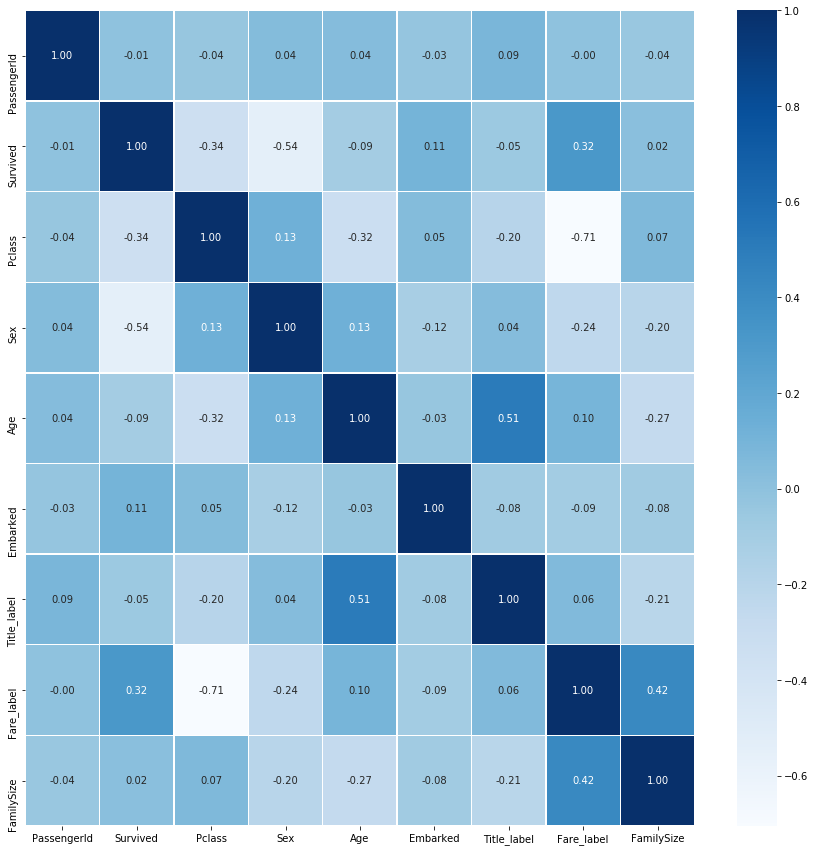

In [143]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

## Modeling

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int8   
 3   Age          891 non-null    float64
 4   Embarked     891 non-null    int64  
 5   Title_label  891 non-null    int8   
 6   Fare_label   891 non-null    int8   
 7   FamilySize   891 non-null    float64
dtypes: float64(2), int64(3), int8(3)
memory usage: 37.5 KB


In [151]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

### 1. Cross Validation (K-fold)

In [152]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 1.2. kNN

In [153]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.83146067 0.84269663 0.80898876 0.88764045 0.80898876
 0.82022472 0.80898876 0.84269663 0.84269663]


In [154]:
# kNN Score
round(np.mean(score)*100, 2)

83.17

### 1.2. Decision Tree

In [155]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.83146067 0.82022472 0.7752809  0.86516854 0.7752809
 0.83146067 0.80898876 0.79775281 0.83146067]


In [156]:
# decision tree Score
round(np.mean(score)*100, 2)

81.37

### 1.3. Ramdom Forest

In [157]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.84269663 0.80898876 0.7752809  0.87640449 0.79775281
 0.85393258 0.83146067 0.78651685 0.84269663]


In [158]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.82

### 1.4 Naive Bayes

In [159]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.76404494 0.7752809  0.75280899 0.68539326 0.79775281
 0.78651685 0.79775281 0.84269663 0.83146067]


In [160]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

### 1.5 SVM

In [163]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.82022472 0.82022472 0.84269663 0.80898876
 0.83146067 0.85393258 0.83146067 0.86516854]


In [164]:
round(np.mean(score)*100,2)

83.16

## 2. Testing

In [43]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [44]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [45]:
submission = pd.read_csv('submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

## References

- [Mukesh ChapagainTitanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)
- [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)
- [Titanic Survivors Dataset and Data Wrangling](http://www.codeastar.com/data-wrangling/)
- [허민석님의 타이타닉 생존자 예측하기](https://youtu.be/aqp_9HV58Ls)
- Pandas 공식 홈페이지에 있는 타이타닉 생존자 예측 tutorial
